---------------
Model Pre Work
---------------

Loading Libraies

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pandas as pd
import numpy as np
from collections import Counter

Loading Dataset

In [4]:
ex_data = pd.read_csv(r'./100_files_mfcc.csv')
ex_data['Features'] = ex_data['Features'].apply(lambda x: list(map(float, x.split(','))))

In [5]:
ex_data

,Features,Class
0,"[-351.6251220703125, 86.87262725830078, -14.98...",Cargo
1,"[-433.6374816894531, 102.78813934326172, 4.263...",Cargo
2,"[-459.4378967285156, 118.9866714477539, 14.566...",Cargo
3,"[-503.5106201171875, 129.89466857910156, 12.60...",Cargo
4,"[-290.6701965332031, 115.29109191894531, -9.09...",Cargo
...,...,...
365,"[-497.34600830078125, 64.05010986328125, -9.53...",Tug
366,"[-507.68927001953125, 109.86592102050781, 2.85...",Tug
367,"[-408.8243408203125, 100.6327133178711, -5.617...",Tug
368,"[-433.462646484375, 86.5696029663086, -6.83201...",Tug


Splitting Features

In [6]:
X=np.array(ex_data['Features'].tolist())
y=np.array(ex_data['Class'].tolist())

In [7]:
print('mfcc Features       : ',X.shape)
print('Class Labels shape  : ',y.shape)

mfcc Features       :  (370, 40)
Class Labels shape  :  (370,)


In [8]:
X_copy_1 = X
y_copy_1 = y

X_copy_2 = X
y_copy_2 = y

In [9]:
#label encoding the class labels of y_copy_1

label_encoder = LabelEncoder()
y_copy_1 = label_encoder.fit_transform(y)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_copy_1,y_copy_1,test_size=0.2,random_state=0)

Total count for all audio files loaded

In [26]:
# Count the occurrences of each category
category_count = Counter(y)

# Print the total count of each category
for category, count in category_count.items():
    print(f'{category}: {count}')

Cargo: 100
Passenger: 100
Tanker: 101
Tug: 69


Total count for training data

In [27]:
# Count the occurrences of each category
category_count = Counter(y_train)

# Print the total count of each category
for category, count in category_count.items():
    print(f'{category}: {count}')

3: 58
0: 76
2: 82
1: 80


-----------------------
Machine Learning Models
-----------------------

---------
SVM

Loading Libraries

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

Defining Parameters for SVM

In [29]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10] 
}

In [30]:
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=4, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

Fitting 4 folds for each of 9 candidates, totalling 36 fits


Testing Accuracy for SVM

In [31]:
test_accuracy = best_svm_model.score(X_test, y_test)

print("Best Parameters  ::", best_params)
print("Test Accuracy    ::", test_accuracy)

Best Parameters  :: {'svm__C': 1, 'svm__gamma': 0.1}
Test Accuracy    :: 0.7162162162162162


Confusion Matrix

Text(70.72222222222221, 0.5, 'Truth')

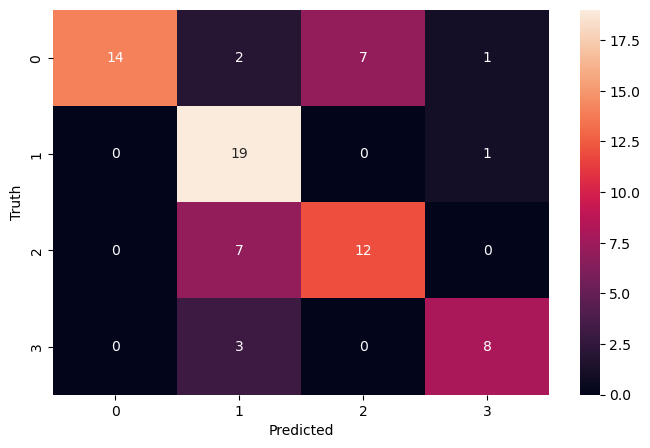

In [37]:
cm = confusion_matrix(y_test, grid_search.predict(X_test))
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#new

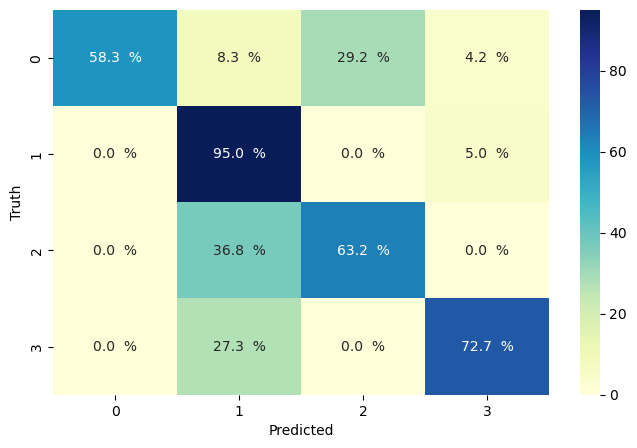

In [33]:
cm = confusion_matrix(y_test, grid_search.predict(X_test))

cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 5))
sn.heatmap(cm_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

ax = plt.gca()
for t in ax.texts:
    t.set_text(t.get_text() + "  %")
plt.show()

Precision & Recall

In [34]:
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        24
           1       0.61      0.95      0.75        20
           2       0.63      0.63      0.63        19
           3       0.80      0.73      0.76        11

    accuracy                           0.72        74
   macro avg       0.76      0.72      0.72        74
weighted avg       0.77      0.72      0.72        74



-----------------------
Deep Learning Models
-----------------------

--------------
Basic ANN Model

Importing Libraries

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Creating Model --- Needs to understand this one

In [12]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
 1/10 [==>...........................] - ETA: 4s - loss: 70.8732 - accuracy: 0.3125
Epoch 1: val_loss improved from inf to 4.52951, saving model to saved_models\audio_classification.hdf5


C:\Users\oceanvue\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 1s 79ms/step - loss: 60.5340 - accuracy: 0.2432 - val_loss: 4.5295 - val_accuracy: 0.4054
Epoch 2/500
 1/10 [==>...........................] - ETA: 0s - loss: 53.0916 - accuracy: 0.1562
Epoch 2: val_loss did not improve from 4.52951
10/10 [==============================] - 0s 4ms/step - loss: 40.7570 - accuracy: 0.2061 - val_loss: 9.7846 - val_accuracy: 0.1486
Epoch 3/500
 1/10 [==>...........................] - ETA: 0s - loss: 36.4606 - accuracy: 0.2188
Epoch 3: val_loss improved from 4.52951 to 2.99815, saving model to saved_models\audio_classification.hdf5
10/10 [==============================] - 0s 12ms/step - loss: 26.8810 - accuracy: 0.2331 - val_loss: 2.9981 - val_accuracy: 0.1486
Epoch 4/500
 1/10 [==>...........................] - ETA: 0s - loss: 21.4584 - accuracy: 0.2812
Epoch 4: val_loss improved from 2.99815 to 1.60251, saving model to saved_models\audio_classification.hdf5
10/10 [==============================] - 0s 8ms/step - loss

Testing Model Performance

Classification Report

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Print classification report
print(classification_report(y_test_decoded, y_pred_decoded))

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       Cargo       1.00      0.08      0.15        24
   Passenger       0.55      0.80      0.65        20
      Tanker       0.42      0.68      0.52        19
         Tug       0.83      0.91      0.87        11

    accuracy                           0.55        74
   macro avg       0.70      0.62      0.55        74
weighted avg       0.70      0.55      0.49        74



Model Accuracy

In [20]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5540540814399719


Confusion Matrix

Text(70.72222222222221, 0.5, 'Truth')

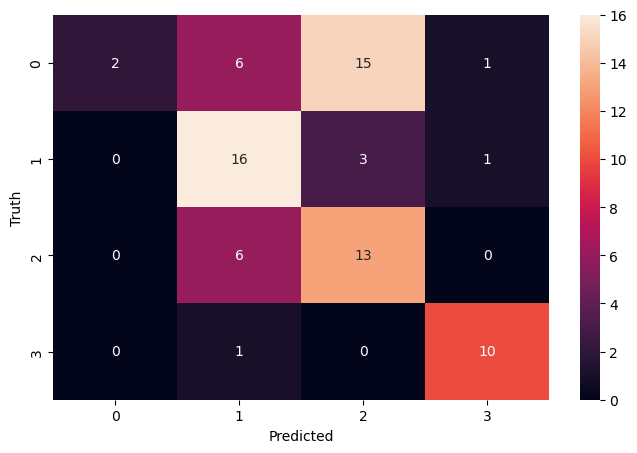

In [23]:
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')